In [1]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
# Biblotecas de manipulação de dados
import numpy as np
import pandas as pd
# Bibliotecas de visualização
import seaborn as sns
import matplotlib.pyplot as plt
# Testes estatísticos
from scipy.stats import ttest_ind

from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [3]:
# Bibliotecas Locais
from carga import *
from tratamentos import *
from categorizacao import *

pfEnade = doCarga('microdados_enade_2019.txt')
# TRATAMENTOS 
pfEnade = doIdade(pfEnade)
pfEnade = doNota(pfEnade)
pfEnade = doVazios(pfEnade)
pfEnade = doPublicoPrivada(pfEnade)
pfEnade = doHumanasExatas(pfEnade)
pfEnade = doRenda(pfEnade)
pfEnade = doMigracao(pfEnade)
pfEnade = doRenda(pfEnade)
pfEnade = doEscolaridade(pfEnade)
pfEnade = doCategoricos(pfEnade)

X, y, X_train, X_test, y_train, y_test = doSplit(pfEnade)

In [12]:
pfEnade.head()

,CO_GRUPO,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,NT_GER,QE_I04,QE_I05,QE_I07,QE_I08,...,BomAluno,BaixaRenda,Sexo,Familia,Solo,RecemFormado,Jovem,Sustento,intervalos_idades,Age
0,5710,51,5,27,M,51.9,D,E,D,B,...,1,1,1,4,0,0,0,0,Entre 30 e 35,4
1,5710,51,5,26,M,54.2,E,D,B,E,...,1,0,1,2,1,0,0,0,Entre 30 e 35,4
3,5710,51,5,24,M,42.1,F,F,C,E,...,0,0,1,3,1,1,1,1,Entre 21 e 25,3
5,5710,51,5,26,M,49.3,E,E,A,C,...,0,0,1,1,1,0,0,0,Entre 30 e 35,4
6,5710,51,5,24,M,49.6,E,E,B,E,...,0,0,1,2,1,0,1,1,Entre 21 e 25,3


In [4]:
# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6488599585439471


In [5]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [6]:

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=30)
scores = cross_val_score(knn, X, y.values.ravel(), cv=10, scoring='accuracy')
print(scores)

[0.66726662 0.59731222 0.62083033 0.62431006 0.65710514 0.70619299
 0.62842055 0.6081373  0.5956553  0.59805569]


In [7]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.6303286193177516


In [8]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y.values.ravel(), cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5700854829357291, 0.5858781235091207, 0.5891660880283682, 0.5983585537832922, 0.5975069790864163, 0.6069514419643356, 0.6049713036879277, 0.6115716599609141, 0.6077795427830008, 0.6152197915381363, 0.6151479470696593, 0.6187120104803522, 0.6178000200694458, 0.6225522649498649, 0.6207643186912786, 0.6231164617728326, 0.6211482649318923, 0.625624485806858, 0.6224565952150616, 0.6258648266372007, 0.6233806854741107, 0.6269927565660326, 0.6241125117095769, 0.6270646183158923, 0.6259366307824514, 0.6286006509781666, 0.6274005424741247, 0.6291885866605467, 0.6278444896755835, 0.6303286193177516]


Text(0, 0.5, 'Cross-Validated Accuracy')

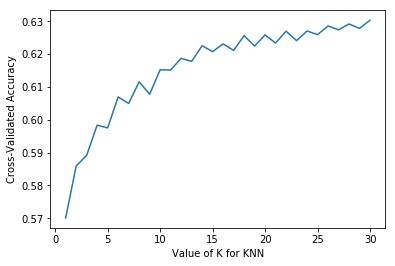

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [10]:

# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

C:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Program Files\Microsoft SQL Ser

In [11]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

C:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\utils\validation.py:761: DataC